<a href="https://colab.research.google.com/github/descandon88/tesis_maestria/blob/main/calc_coi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from itertools import count
import json
import networkx as nx


In [2]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


# Se importan las bases desde Drive

In [3]:
df = pd.read_csv("/content/drive/MyDrive/eci/base/base_eci_pci/df_ecm2.csv").copy()
df_rca = pd.read_csv("/content/drive/MyDrive/eci/base/base_eci_pci/df_rca.csv").copy()
df_dcp_2017 = pd.read_csv("/content/drive/MyDrive/eci/base/base_eci_pci/df_cpd.csv").copy()
countryComplexityBase = pd.read_csv("/content/drive/MyDrive/eci/base/base_eci_pci/CountryComplexityRankingsBase.csv")

In [4]:
# df.sample(n=10)
df_dcp_2017 = df_dcp_2017[['country_name','product_name_1','density']].copy()
df_dcp_2017 = df_dcp_2017.rename(columns= {'product_name_1':'product_name'}).copy()
df_dcp_2017.head(5)

,country_name,product_name,density
0,Aruba,Bovine animals; live,0.109932
1,Aruba,Swine; live,0.094257
2,Aruba,Sheep and goats; live,0.093145
3,Aruba,Meat of bovine animals; fresh or chilled,0.100331
4,Aruba,Meat of bovine animals; frozen,0.084315


In [56]:
df_rca.sample(n=10)
df_rca_2017 = df_rca[df_rca['year']==2017].copy()
df_rca_2017 = df_rca_2017[['year','country_name','product_name','product_short_name','product_code','export_value','RCAcpt','Mcp']]
df_rca_2017.head()
# df_rca_2017.info()

,year,country_name,product_name,product_short_name,product_code,export_value,RCAcpt,Mcp
6612408,2017,Aruba,"Horses, asses, mules and hinnies; live",Horses,101,6161.0,0.129766,0
6612409,2017,Aruba,Bovine animals; live,Bovine,102,0.0,0.000000,0
6612410,2017,Aruba,Swine; live,Swine,103,0.0,0.000000,0
6612411,2017,Aruba,Sheep and goats; live,Sheep,104,0.0,0.000000,0
6612412,2017,Aruba,"Poultry; live, fowls of the species gallus dom...",Fowl,105,116356.0,2.305130,1


In [57]:
m_df = pd.merge(df_rca_2017, df_dcp_2017[['country_name','product_name','density']], how='left', on=['country_name','product_name']).fillna(0).copy()
# m_df = pd.concat([df_rca_2017, df_dcp_2017], axis=1,).reindex(df_rca_2017.index)
m_df.head(8)
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300564 entries, 0 to 300563
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year                300564 non-null  int64  
 1   country_name        300564 non-null  object 
 2   product_name        300564 non-null  object 
 3   product_short_name  300564 non-null  object 
 4   product_code        300564 non-null  int64  
 5   export_value        300564 non-null  float64
 6   RCAcpt              300564 non-null  float64
 7   Mcp                 300564 non-null  int64  
 8   density             300564 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 22.9+ MB


In [58]:
df = df[['country_name','product_name','product_code','export_value','year','pci','eci','product_short_name','Mcp']].copy()
df_ec = df[(df['country_name']=='Ecuador')&(df['year']==2017)].copy()
df_2017 = df[(df['year']==2017)].copy()

In [59]:
# df_ec.sample(n=7)
df_2017.head(5)

,country_name,product_name,product_code,export_value,year,pci,eci,product_short_name,Mcp
5024,Afghanistan,Abrasive powder or grain; natural or artificia...,6805,0,2017,3.08353,-1.297002,Natural or artificial abrasive powder,0
5025,Albania,Abrasive powder or grain; natural or artificia...,6805,0,2017,3.08353,-0.288020,Natural or artificial abrasive powder,0
5026,Algeria,Abrasive powder or grain; natural or artificia...,6805,0,2017,3.08353,-0.743123,Natural or artificial abrasive powder,0
5027,American Samoa,Abrasive powder or grain; natural or artificia...,6805,0,2017,3.08353,0.785317,Natural or artificial abrasive powder,0
5028,Andorra,Abrasive powder or grain; natural or artificia...,6805,11279,2017,3.08353,1.131309,Natural or artificial abrasive powder,0


In [60]:
df_all = pd.merge(m_df, df_2017[['country_name','product_code','pci','eci']], how='left', on=['country_name','product_code']).fillna(0).copy()
df_all.head()

,year,country_name,product_name,product_short_name,product_code,export_value,RCAcpt,Mcp,density,pci,eci
0,2017,Aruba,"Horses, asses, mules and hinnies; live",Horses,101,6161.0,0.129766,0,0.000000,1.284984,0.86745
1,2017,Aruba,Bovine animals; live,Bovine,102,0.0,0.000000,0,0.109932,-0.478910,0.86745
2,2017,Aruba,Swine; live,Swine,103,0.0,0.000000,0,0.094257,2.053777,0.86745
3,2017,Aruba,Sheep and goats; live,Sheep,104,0.0,0.000000,0,0.093145,-2.105110,0.86745
4,2017,Aruba,"Poultry; live, fowls of the species gallus dom...",Fowl,105,116356.0,2.305130,1,0.000000,0.682853,0.86745


In [10]:
df_ec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1221 entries, 5087 to 7372396
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country_name        1221 non-null   object 
 1   product_name        1221 non-null   object 
 2   product_code        1221 non-null   int64  
 3   export_value        1221 non-null   int64  
 4   year                1221 non-null   int64  
 5   pci                 1221 non-null   float64
 6   eci                 1221 non-null   float64
 7   product_short_name  1221 non-null   object 
 8   Mcp                 1221 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 95.4+ KB


#Calculo de Proximidad

In [ ]:
from itertools import count
from itertools import combinations
from itertools import product

def calc_cppt(data,country_col,product_col):
    """
    Función para el cálculo de las co-ocurrencias en los países
    Retorna:
        Dataframe con valores de co-ocurrencias para cada par de producto
    """

    # Se crea combinaciones dentro del country_col (i.e. paises) por productos (i.e. products)
    dft = (data.groupby(country_col)[product_col].apply(lambda x: pd.DataFrame(list(combinations(x,2))))
            .reset_index(level=1, drop=True)
            .reset_index())
    dft.rename(columns={0:f'{product_col}_1'}, inplace=True)
    dft.rename(columns={1:f'{product_col}_2'}, inplace=True)

    # -- {product_col} 1 X {product_col} 2 == {product_col} 2 X {product_col} 1
    dft2 = dft.copy()
    dft2.rename(columns={f'{product_col}_1':f'{product_col}_2t'}, inplace=True)
    dft2.rename(columns={f'{product_col}_2':f'{product_col}_1'}, inplace=True)
    dft2.rename(columns={f'{product_col}_2t':f'{product_col}_2'}, inplace=True)
    # -- add second half
    dft3 = pd.concat([dft,dft2],axis=0,sort=False)

    # retiro de diagonales en caso de que estén presentes
    dft3 = dft3[ dft3[f'{product_col}_1'] != dft3[f'{product_col}_2'] ]

    # se calcula la cantindad N veces que los {product_col}s ocurren simultáneamente
    dft3['count'] = 1
    dft3 = dft3.groupby([f'{product_col}_1',f'{product_col}_2'],as_index=False)['count'].sum()
    dft3.rename(columns={f'count':f'Cpp'}, inplace=True)

    # Calculo de Ubicuidad
    df_ub = data.groupby(product_col,as_index=False)['Mcp'].sum()

    # merge del calculo de ubicuidad en la matriz de cpp 
    df_ub.rename(columns={f'{product_col}':f'{product_col}_1'}, inplace=True)
    dft3 = pd.merge(dft3,df_ub,how='left',on=f'{product_col}_1')

    df_ub.rename(columns={f'{product_col}_1':f'{product_col}_2'}, inplace=True)
    dft3 = pd.merge(dft3,df_ub,how='left',on=f'{product_col}_2')

    # Toma el min de probabilidades condicionales
    dft3['kpi'] = dft3['Cpp']/dft3['Mcp_x']
    dft3['kpj'] = dft3['Cpp']/dft3['Mcp_y']
    dft3['phi'] = dft3['kpi']
    dft3.loc[dft3['kpj']<dft3['kpi'],'phi'] = dft3['kpj']
    
    return dft3

In [ ]:
# Filtro la base para el año 2017
dft = df_rca[df_rca['year']==2017].copy()

# Se mantienen las combinaciones de país-producto donde Mcp == 1 ( RCAcp> 1)
dft = dft[dft['Mcp']==1]

# Se calcula cpp con la función df_cpp

df_ccpt= calc_cppt(dft,country_col='country_name',product_col='product_name')

print('dataframe de productos co-ocurrentes y aproximados del 2019 se encuentra listo')


dataframe de productos co-ocurrentes y aproximados del 2019 se encuentra listo


In [ ]:
df_ccpt.head(10)

,product_name_1,product_name_2,Cpp,Mcp_x,Mcp_y,kpi,kpj,phi
0,Abrasive powder or grain; natural or artificia...,Acetals and hemiacetals; whether or not with o...,3,23,13,0.130435,0.230769,0.130435
1,Abrasive powder or grain; natural or artificia...,Acids; carboxylic acid with additional oxygen ...,3,23,22,0.130435,0.136364,0.130435
2,Abrasive powder or grain; natural or artificia...,"Acids; polycarboxylic acids, their anhydrides,...",4,23,15,0.173913,0.266667,0.173913
3,Abrasive powder or grain; natural or artificia...,Acids; saturated acyclic monocarboxylic acids ...,5,23,17,0.217391,0.294118,0.217391
4,Abrasive powder or grain; natural or artificia...,"Acids; unsaturated acyclic monocarboxylic, cyc...",7,23,22,0.304348,0.318182,0.304348
5,Abrasive powder or grain; natural or artificia...,Acrylic polymers in primary forms,9,23,18,0.391304,0.500000,0.391304
6,Abrasive powder or grain; natural or artificia...,Activated carbon; activated natural mineral pr...,4,23,27,0.173913,0.148148,0.148148
7,Abrasive powder or grain; natural or artificia...,"Acyclic alcohols and their halogenated, sulpho...",3,23,27,0.130435,0.111111,0.111111
8,Abrasive powder or grain; natural or artificia...,Acyclic hydrocarbons,6,23,28,0.260870,0.214286,0.214286
9,Abrasive powder or grain; natural or artificia...,Agglomerated cork (with or without a binding s...,3,23,8,0.130435,0.375000,0.130435


# Cálculo de Complexity Outlook Index (COI)

## A measure of how many complex products are near a country’s current set of productive capabilities. The COI captures the ease of diversification for a country, where a high COI reflects an abundance of nearby complex products that rely on similar capabilities or know-how as that present in current production. Complexity outlook captures the connectedness of an economy’s existing capabilities to drive easy (or hard) diversification into related complex production, using the Product Space.

## A low complexity outlook reflects that a country has few products that are a short distance away, so will find it difficult to acquire new know-how and increase their economic complexity.

## Technical breakout: To calculate COI we first need to calculate distance of every product to existing production (from 0 to 1). We then sum the ‘closeness,’ i.e. 1 minus the distance to the products that the country is not currently making, weighted by the level of complexity of these products. Formally,

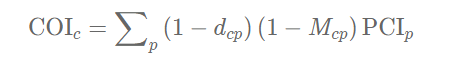





In [246]:
d = {'country_name': ['Ecuador','Ecuador','Ecuador','Ecuador','Ecuador', 'Ecuador','Uruguay','Uruguay','Uruguay','Uruguay','Ecuador','Ecuador','Ecuador','Ecuador','Ecuador'],
     'product_name': ['petroleo', 'petroleo','petroleo','petroleo','mariscos','mariscos','carne','carne','carne','petroleo','plastico','plastico','electronica','mercurio','Fibra Optica'],
     'density':[0.01,0.03,0.02,0.06,0.06,0.03,0.5,0.07,0.06,0,0,0.09,0,0.9,0],
     'Mcp': [1,1,1,1,1,1,1,1,1,0,0,0,0,0,0],
     'pci':[3.08,3.1,3.010,2.8,1.02,-0.08,0.5,0.3,-0.2,3.1,2.7,2,-3.2,20,32]}
df_tmp = pd.DataFrame(data=d)
df_tmp.head(15)

,country_name,product_name,density,Mcp,pci
0,Ecuador,petroleo,0.01,1,3.08
1,Ecuador,petroleo,0.03,1,3.10
2,Ecuador,petroleo,0.02,1,3.01
3,Ecuador,petroleo,0.06,1,2.80
4,Ecuador,mariscos,0.06,1,1.02
5,Ecuador,mariscos,0.03,1,-0.08
6,Uruguay,carne,0.50,1,0.50
7,Uruguay,carne,0.07,1,0.30
8,Uruguay,carne,0.06,1,-0.20
9,Uruguay,petroleo,0.00,0,3.10


In [329]:
def cal_coic(data,
             col_pro=None,
             col_dcp=None,
             col_pci=None,
             col_mcp=None,
             col_value=None):
  "En la siguiente función se realizará el cálculo de COI para cada país del dataframe"
  t_df = data.copy()

  
  #Se realiza el cálculo de propiedades
  # t_df['density_r'] = t_df[['Mcp','density']].apply(lambda x: 0 if (x.Mcp==0) else x.density,axis=1 )

  t_df['distancia']=t_df.apply( lambda x: (1-x.density),axis = 1)
  
  # t_df['OneminsDcp']=t_df.apply( lambda x: (1 - x.distancia),axis = 1)
  t_df['mcp_r']=t_df.apply( lambda x: (1 - x.Mcp),axis = 1)
  t_df['pcip_r']=t_df.apply( lambda x: (x.mcp_r)*x.pci,axis = 1)
  t_df['product_r']=t_df.apply( lambda x: (x.density *x.pcip_r),axis = 1)

  

  # Se realiza la suma por cada país.
  # for (distz) in zip( t_df['distancia']):
  #       if distz == 1:
         
  t_df=t_df.query('RCAcpt<=0 & Mcp==0 & density!=0')
  g3 = t_df['product_r'].groupby(t_df['country_name'], as_index=True )

  t_df['coi_c'] = g3.transform('sum')
  # t_df['coi_c']=t_df[t_df['distancia']==1]['product_r'].sum()




  result = t_df.copy()
  # result = result_tmp.copy()
  print("Cálculo realizado!")
  return result           


In [330]:
df_coic = cal_coic(df_all,col_dcp='density',col_pci='pci',col_mcp='Mcp',col_value='RCAcpt').copy()
# col_pro='product_name'
df_coic.head(5)

Cálculo realizado!


<ipython-input-329-d6ed19692489>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t_df['coi_c'] = g3.transform('sum')


,year,country_name,product_name,product_short_name,product_code,export_value,RCAcpt,Mcp,density,pci,eci,distancia,mcp_r,pcip_r,product_r,coi_c
1,2017,Aruba,Bovine animals; live,Bovine,102,0.0,0.0,0,0.109932,-0.478910,0.86745,0.890068,1,-0.478910,-0.052648,40.872093
2,2017,Aruba,Swine; live,Swine,103,0.0,0.0,0,0.094257,2.053777,0.86745,0.905743,1,2.053777,0.193582,40.872093
3,2017,Aruba,Sheep and goats; live,Sheep,104,0.0,0.0,0,0.093145,-2.105110,0.86745,0.906855,1,-2.105110,-0.196081,40.872093
6,2017,Aruba,Meat of bovine animals; fresh or chilled,Beef,201,0.0,0.0,0,0.100331,-0.253482,0.86745,0.899669,1,-0.253482,-0.025432,40.872093
7,2017,Aruba,Meat of bovine animals; frozen,Beef (frozen),202,0.0,0.0,0,0.084315,-1.242446,0.86745,0.915685,1,-1.242446,-0.104757,40.872093


In [335]:
df_ecuador = df_coic[(df_coic['country_name']=='Japan')].copy()

# df_ecuador.head(5)
# df_ecuador['Mcp'].value_counts()
# df_ecuador.sample(n=7)
df_ecuador.sample(n=2)
# df_ecuador.info()

,year,country_name,product_name,product_short_name,product_code,export_value,RCAcpt,Mcp,density,pci,eci,distancia,mcp_r,pcip_r,product_r,coi_c
127939,2017,Japan,"Meat and edible meat offal, n.e.s. in chapter ...",Other meat,208,0.0,0.0,0,0.242414,0.37153,2.284998,0.757586,1,0.37153,0.090064,-1.995197
127927,2017,Japan,Bovine animals; live,Bovine,102,0.0,0.0,0,0.224892,-0.47891,2.284998,0.775108,1,-0.47891,-0.107703,-1.995197


In [171]:
result = df_ecuador['pcip_r'][df_ecuador['pcip_r']!=0].count()

#1165
## estoy contando 1144 productos para el coi
## hay 98 productos con 0 para coi
## 301 productos menores a 0 
## 843 productos mayores a 0
result

1144

In [333]:
primerTermino = df_ecuador['product_r'].sum()
# segundoTermino = df_ecuador['pcip_r'].sum()
# resultadoCOI =  primerTermino*segundoTermino
primerTermino

7.279280499337307

### Resultados en la primera función:

Ecuador:	4.304
Uruguay:	3.069

### Resultados de la segunda función + agregando nuevo producto (a Ecuador) a la base:

Ecuador:	1.136
Uruguay:	3.069

# Plot de COI y ECI

### Limpieza de la base CountryComplexityRankingsBase.csv 

In [178]:
countryComplexityBase.head()

,Country,ECI Rank 1995,ECI Rank 1996,ECI Rank 1997,ECI Rank 1998,ECI Rank 1999,ECI Rank 2000,ECI Rank 2001,ECI Rank 2002,ECI Rank 2003,...,COI Rank 2011,COI Rank 2012,COI Rank 2013,COI Rank 2014,COI Rank 2015,COI Rank 2016,COI Rank 2017,COI Rank 2018,COI Rank 2019,COI Rank 2020
0,Angola,127.0,129.0,127.0,128.0,124.0,131.0,132.0,132.0,132.0,...,122,119,117,119,126,121,125,124,125,125
1,Albania,84.0,81.0,79.0,76.0,77.0,69.0,71.0,68.0,73.0,...,67,69,66,70,71,67,70,70,69,64
2,United Arab Emirates,69.0,82.0,75.0,66.0,76.0,81.0,74.0,75.0,64.0,...,82,80,94,83,81,71,72,87,106,106
3,Argentina,52.0,60.0,57.0,57.0,55.0,54.0,58.0,61.0,59.0,...,46,48,50,47,48,55,50,51,54,61
4,Armenia,67.0,22.0,26.0,27.0,30.0,35.0,32.0,29.0,43.0,...,69,66,81,84,82,86,96,91,91,93


In [179]:
countryComplexityBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Columns: 105 entries, Country to COI Rank 2020
dtypes: float64(72), int64(32), object(1)
memory usage: 109.2+ KB


In [180]:
df_CoiVsEciBase = countryComplexityBase.filter(items=['Country','ECI 2017','COI 2017'], axis=1)

df_CoiVsEciBase.head()

,Country,ECI 2017,COI 2017
0,Angola,-1.580759,-1.258927
1,Albania,-0.351054,-0.193147
2,United Arab Emirates,0.222875,-0.204271
3,Argentina,-0.268441,0.337024
4,Armenia,-0.422667,-0.824041


#Plot de COI vs ECI

<ipython-input-339-679ac14a31bf>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(eci2017, coi2017, s=60, alpha=0.7, edgecolors="k",cmap='gray');
<ipython-input-339-679ac14a31bf>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Eciz, Coiz, alpha=0.9, edgecolors="r",cmap='red')


Text(0, 0.5, 'Índice de Prospeccion Económica "COI" [2017]')

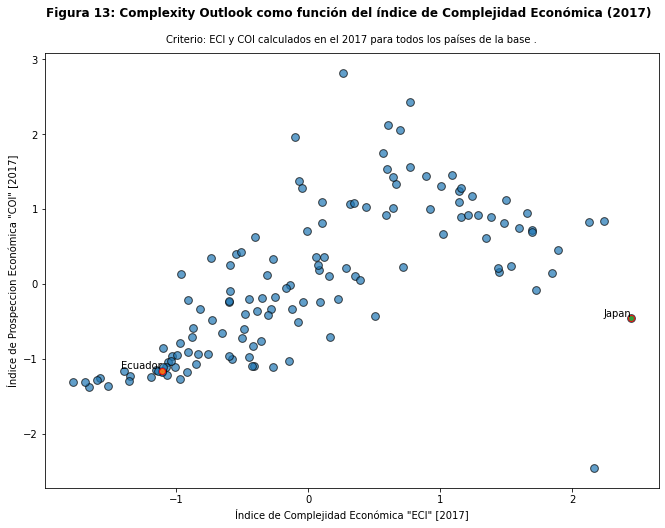

In [339]:
# Initialize layout
fig, ax = plt.subplots(figsize = (11, 8))

eci2017=df_CoiVsEciBase['ECI 2017']
coi2017=df_CoiVsEciBase['COI 2017']
countryNames=df_CoiVsEciBase['Country']
# Add scatterplot
# fig, ax = plt.subplots()

plt.scatter(eci2017, coi2017, s=60, alpha=0.7, edgecolors="k",cmap='gray');

# plt.scatter(random(10), random(10), marker='d', 
#                     color=colors[0],label='Label 5')

# mw, bw = np.polyfit(dfw_2017['eci'], dfw_2017['LOG_GDP'], 1)
# plt.title("Figura 7: RELACIÓN ENTRE ECI Y LOG PBI PER CÁPITA (2017)",fontsize=12,fontweight="bold")
plt.title('Criterio: ECI y COI calculados en el 2017 para todos los países de la base .',  fontsize=10,
    pad=10,
    loc="center")
plt.suptitle(
    "Figura 13: Complexity Outlook como función del índice de Complejidad Económica (2017)",
    fontsize=12,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# Se añade el label y el color sólo a Ecuador. 
for (Eciz, Coiz,nz) in zip(eci2017, coi2017,countryNames):
        if (nz == "Ecuador") | (nz=='Japan'):
          plt.scatter(Eciz, Coiz, alpha=0.9, edgecolors="r",cmap='red')
          plt.text(Eciz, Coiz, nz, va='bottom', ha='right')

      

plt.xlabel('Índice de Complejidad Económica "ECI" [2017]')
plt.ylabel('Índice de Prospeccion Económica "COI" [2017]')



# plt.plot(dfw_2017['eci'], mw*dfw_2017['eci']+bw, color='gray')

# Plot gdp per capita vs ECI

In [182]:
df_gdp_pc = pd.read_csv("/content/drive/MyDrive/eci/base/gpd_per_capita_countries_db.csv")

In [183]:
def gdppc_countries(data):

    data = data.filter(items=['Country Name','Country Code','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']).copy()
    # years = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
    # vecinos
    # df_eci_vecinos = df_ec[(df_ec['year'].isin(years)) & (df_ec['country_name'].isin(vecinos))].copy()

    data=data.rename(columns={"Country Name": "country_name", "Country Code": "country_code"}).copy()
    data=data.melt(id_vars=["country_name", "country_code"], var_name="year", value_name="Value").copy()
    data=data.rename(columns={"Value": "gdp_per_capita"}).copy()
    data =  data.loc[data["country_name"] != 'Latin America & the Caribbean (IDA & IBRD countries)' ].copy()
    data =  data.loc[data["country_name"] != 'Europe & Central Asia (excluding high income)' ].copy()
    data =  data.loc[data["country_name"] != 'World' ].copy()
    data =  data.loc[data["country_name"] != 'Fragile and conflict affected situations'].copy()
    data =  data.loc[data["country_name"] != 'Pacific island small states'].copy()
    data =  data.loc[data["country_name"] != 'OECD members'].copy()
    data =  data.loc[data["country_name"] != 'Caribbean small states'].copy()
    data =  data.loc[data["country_name"] != 'Heavily indebted poor countries (HIPC)'].copy()
    data =  data.loc[data["country_name"] != 'Small states'].copy()
    data =  data.loc[data["country_name"] != 'East Asia & Pacific (excluding high income)'].copy()
    data =  data.loc[data["country_name"] != 'Europe & Central Asia (IDA & IBRD countries)'].copy()
    ## No se consideran aquellos países indicados por region
    data =  data.loc[(data["country_name"] != 'Lower middle income') & (data["country_name"] != 'IBRD only')& (data["country_name"] != 'IDA total') & (data["country_name"] != 'East Asia & Pacific')
    &(data['country_name']!='Sub-Saharan Africa (excluding high income)')&(data['country_name']!='Low & middle income')&(data['country_name']!='Not classified')
    &(data['country_name']!='Middle East & North Africa (IDA & IBRD countries)')&(data['country_name']!='Post-demographic dividend')&(data['country_name']!='Latin America & Caribbean')
    &(data['country_name']!='Middle income')&(data['country_name']!='East Asia & Pacific (IDA & IBRD countries)')&(data['country_name']!='IDA & IBRD total') &(data['country_name']!='South Asia (IDA & IBRD)')
    &(data['country_name']!='South Asia')
    &(data['country_name']!='Least developed countries: UN classification')].copy()
    ## Se reemplaza actualiza los nombres de paises de la base del Banco Mundial para igualarlos con los de la base CONTRADE
    data=data.replace("Korea, Dem. People's Rep.", "North Korea").copy()
    data=data.replace("Korea, Rep.", "South Korea").copy()
    data=data.replace("Cote d'Ivoire", "Côte d'Ivoire").copy()
    data=data.replace("Congo, Dem. Rep.", "Congo (Democratic Republic of the)").copy()
    data=data.replace("Congo, Rep.", "Congo").copy()
    data=data.replace("Curacao", "Curaçao").copy()
    data=data.replace("British Virgin Islands","Virgin Islands (British)").copy()
    data=data.replace("Egypt, Arab Rep.","Egypt").copy()
    data=data.replace("Hong Kong SAR","Hong Kong").copy()
    data=data.replace("United States","United States of America").copy()
    data=data.replace("St. Vincent and the Grenadines","Saint Vincent and the Grenadines").copy()
    data=data.replace("Venezuela, RB","Venezuela").copy()

    data["year"]=data["year"].astype(np.int64).copy()

    return data


In [184]:
df_gdppc_countries=gdppc_countries(df_gdp_pc)

def changinColName(data):
  data = data.rename(columns={'country_name':'Country'})
  return data
  
df_gdppc_countries=changinColName(df_gdppc_countries)
df_gdppc_countries.head()

,Country,country_code,year,gdp_per_capita
0,Aruba,ABW,2000,21023.157510
1,Africa Eastern and Southern,AFE,2000,706.992061
2,Afghanistan,AFG,2000,NaN
3,Africa Western and Central,AFW,2000,520.786584
4,Angola,AGO,2000,556.884244


### Se realiza un merge entre la base gdp vs Eci para que queden en un sólo dataframe.

In [185]:
def filtrarBaseGDPporAnio (data):
  # years = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
  year = [2017]
  data_filtered = data[(data['year'].isin(year))].copy()
  return data_filtered

In [186]:
df_gpd2017=filtrarBaseGDPporAnio(df_gdppc_countries)
df_gpd2017.head()

,Country,country_code,year,gdp_per_capita
4522,Aruba,ABW,2017,29326.708060
4523,Africa Eastern and Southern,AFE,2017,1613.788555
4524,Afghanistan,AFG,2017,530.149831
4525,Africa Western and Central,AFW,2017,1585.911930
4526,Angola,AGO,2017,2283.214233


In [187]:
df_GdpVsEciBase = pd.merge(df_gpd2017, df_CoiVsEciBase, how='right', on=['Country'])
df_GdpVsEciBase = df_GdpVsEciBase[['Country','country_code','gdp_per_capita','ECI 2017','COI 2017']]
df_GdpVsEciBase['LOG_GDP'] = np.log2(df_GdpVsEciBase['gdp_per_capita']).copy()

df_GdpVsEciBase.head()

,Country,country_code,gdp_per_capita,ECI 2017,COI 2017,LOG_GDP
0,Angola,AGO,2283.214233,-1.580759,-1.258927,11.156851
1,Albania,ALB,4531.019374,-0.351054,-0.193147,12.145620
2,United Arab Emirates,ARE,43063.967480,0.222875,-0.204271,15.394194
3,Argentina,ARG,14613.041820,-0.268441,0.337024,13.834969
4,Armenia,ARM,4041.995021,-0.422667,-0.824041,11.980852


<ipython-input-188-c78c7f784332>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(gdp2017, coi2017, s=60, alpha=0.7, edgecolors="k",cmap='gray');
<ipython-input-188-c78c7f784332>:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pbiz, Coiz, alpha=0.9, edgecolors="r",cmap='red')
<ipython-input-188-c78c7f784332>:36: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pbiz, Coiz, alpha=0.9, edgecolors="r",cmap='orange')


Text(0, 0.5, 'Índice de Prospeccion Económica "COI" [2017]')

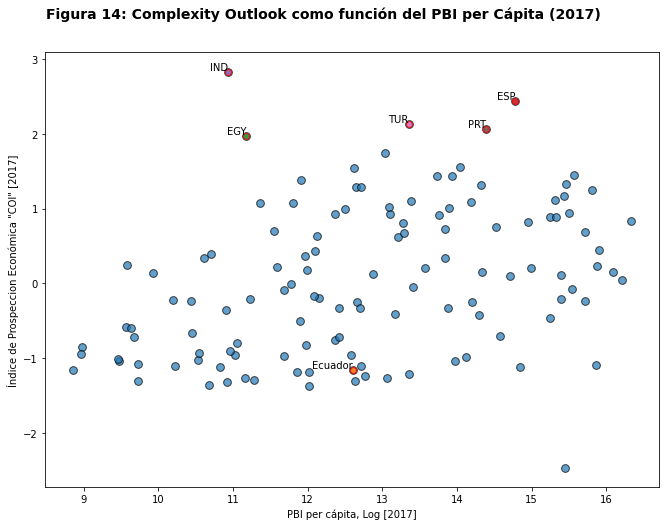

In [188]:
# Initialize layout
fig, ax = plt.subplots(figsize = (11, 8))

coi2017=df_GdpVsEciBase['COI 2017']
gdp2017=df_GdpVsEciBase['LOG_GDP']
countryNames=df_GdpVsEciBase['Country']
nameCode=df_GdpVsEciBase['country_code']
# Add scatterplot
# fig, ax = plt.subplots()

plt.scatter(gdp2017, coi2017, s=60, alpha=0.7, edgecolors="k",cmap='gray');

# plt.scatter(random(10), random(10), marker='d', 
#                     color=colors[0],label='Label 5')

# mw, bw = np.polyfit(dfw_2017['eci'], dfw_2017['LOG_GDP'], 1)
# plt.title("Figura 7: RELACIÓN ENTRE ECI Y LOG PBI PER CÁPITA (2017)",fontsize=12,fontweight="bold")
# plt.title('Criterio: ECI calculados en el 2017 para todos los países de la base',  fontsize=10,
#     pad=10,
#     loc="center")
plt.suptitle(
    "Figura 14: Complexity Outlook como función del PBI per Cápita (2017)",
    fontsize=14,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# Se añade el label y el color sólo a Ecuador. 
for (pbiz, Coiz,nz,codez) in zip(gdp2017, coi2017,countryNames, nameCode):
        if nz == "Ecuador":
          plt.scatter(pbiz, Coiz, alpha=0.9, edgecolors="r",cmap='red')
          plt.text(pbiz, Coiz, nz, va='bottom', ha='right')
        elif Coiz>=1.8:
          plt.scatter(pbiz, Coiz, alpha=0.9, edgecolors="r",cmap='orange')
          plt.text(pbiz, Coiz, codez, va='bottom', ha='right')

      

plt.xlabel('PBI per cápita, Log [2017]')
plt.ylabel('Índice de Prospeccion Económica "COI" [2017]')

# PCI VS COI

In [189]:
df_CoiVsEciBase = countryComplexityBase.filter(items=['Country','ECI 2017','COI 2017'], axis=1)

df_CoiVsEciBase.head()

,Country,ECI 2017,COI 2017
0,Angola,-1.580759,-1.258927
1,Albania,-0.351054,-0.193147
2,United Arab Emirates,0.222875,-0.204271
3,Argentina,-0.268441,0.337024
4,Armenia,-0.422667,-0.824041


In [190]:
def changinColNameToCountryName(data):
  data = data.rename(columns={'Country':'country_name'})
  return data

In [193]:
df_CoiBase = changinColNameToCountryName(df_CoiVsEciBase).copy()
df_CoiBase.sample(n=4)

,country_name,ECI 2017,COI 2017
70,Libya,-1.067632,-1.211540
46,Guinea,-1.694853,-1.308450
26,Colombia,-0.039239,-0.246914
22,Côte d'Ivoire,-0.991865,-0.949689


In [196]:
df_PciCoi = pd.merge(df_all, df_CoiBase[['country_name','COI 2017']], how='right', on=['country_name']).copy()
df_PciCoi.head()

,year,country_name,product_name,product_short_name,product_code,export_value,RCAcpt,Mcp,density,pci,eci,COI 2017
0,2017.0,Angola,"Horses, asses, mules and hinnies; live",Horses,101.0,0.0,0.000000,0.0,0.008455,1.284984,-1.481809,-1.258927
1,2017.0,Angola,Bovine animals; live,Bovine,102.0,1414.0,0.000092,0.0,0.011588,-0.478910,-1.481809,-1.258927
2,2017.0,Angola,Swine; live,Swine,103.0,0.0,0.000000,0.0,0.007375,2.053777,-1.481809,-1.258927
3,2017.0,Angola,Sheep and goats; live,Sheep,104.0,0.0,0.000000,0.0,0.012229,-2.105110,-1.481809,-1.258927
4,2017.0,Angola,"Poultry; live, fowls of the species gallus dom...",Fowl,105.0,0.0,0.000000,0.0,0.007866,0.682853,-1.481809,-1.258927


In [197]:
df_PciCoi_ec = df_PciCoi[df_PciCoi['country_name']=='Ecuador']
df_PciCoi_ec.sample(n=4)

,year,country_name,product_name,product_short_name,product_code,export_value,RCAcpt,Mcp,density,pci,eci,COI 2017
40963,2017.0,Ecuador,"Roundabouts, swings, shooting galleries, other...",Fairground amusements,9508.0,98812.0,0.060734,0.0,0.000000,1.978379,-0.97739,-1.156127
39759,2017.0,Ecuador,Meat and edible offal of poultry; of the poult...,Poultry,207.0,935.0,0.000035,0.0,0.064142,0.821640,-0.97739,-1.156127
40249,2017.0,Ecuador,Leather or composition leather articles n.e.s....,Other articles of leather,4205.0,102701.0,0.032909,0.0,0.000000,0.943532,-0.97739,-1.156127
40965,2017.0,Ecuador,"Vegetable, mineral carving material and articl...",Worked vegetable or mineral carving material,9602.0,780986.0,0.815964,0.0,0.000000,0.634620,-0.97739,-1.156127


<ipython-input-198-b455aad7ba2b>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(density2017, pci2017, s=60, alpha=0.7, edgecolors="k",cmap='gray');


Text(0, 0.5, 'Complejidad Económica por Producto "PCI"[2017]')

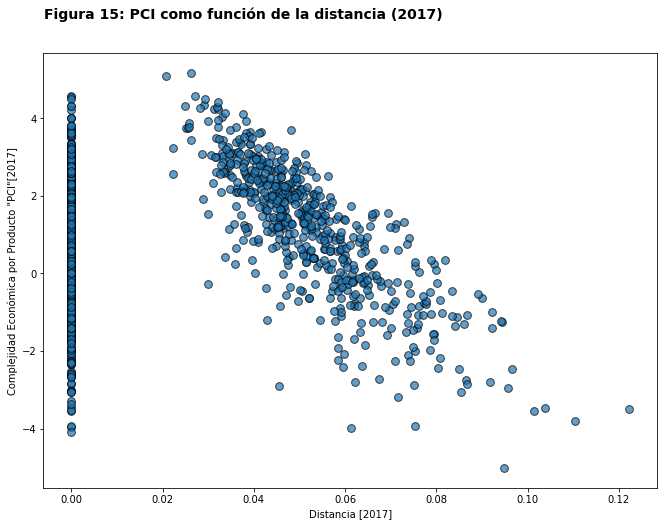

In [198]:
# Initialize layout
fig, ax = plt.subplots(figsize = (11, 8))

density2017=df_PciCoi_ec['density']
pci2017=df_PciCoi_ec['pci']
# countryNames=df_PciCoi_ec['Country']
# nameCode=df_PciCoi_ec['country_code']
# Add scatterplot
# fig, ax = plt.subplots()

plt.scatter(density2017, pci2017, s=60, alpha=0.7, edgecolors="k",cmap='gray');

# plt.scatter(random(10), random(10), marker='d', 
#                     color=colors[0],label='Label 5')

# mw, bw = np.polyfit(dfw_2017['eci'], dfw_2017['LOG_GDP'], 1)
# plt.title("Figura 7: RELACIÓN ENTRE ECI Y LOG PBI PER CÁPITA (2017)",fontsize=12,fontweight="bold")
# plt.title('Criterio: ECI calculados en el 2017 para todos los países de la base',  fontsize=10,
#     pad=10,
#     loc="center")
plt.suptitle(
    "Figura 15: PCI como función de la distancia (2017)",
    fontsize=14,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# Se añade el label y el color sólo a Ecuador. 
# for (pbiz, Coiz,nz,codez) in zip(gdp2017, coi2017,countryNames, nameCode):
#         if nz == "Ecuador":
#           plt.scatter(pbiz, Coiz, alpha=0.9, edgecolors="r",cmap='red')
#           plt.text(pbiz, Coiz, nz, va='bottom', ha='right')
#         elif Coiz>=1.8:
#           plt.scatter(pbiz, Coiz, alpha=0.9, edgecolors="r",cmap='orange')
#           plt.text(pbiz, Coiz, codez, va='bottom', ha='right')

      

plt.xlabel('Distancia [2017]')
plt.ylabel('Complejidad Económica por Producto "PCI"[2017]')

In [199]:
def cal_distance(data,
             col_pro=None,
             col_dcp=None,
             col_pci=None,
             ):
  "En la siguiente función se realizará el cálculo de COI para cada país del dataframe"
  t_df = data.copy()

  
  #Se realiza el cálculo de propiedades
  # t_df['density_r'] = t_df[['Mcp','density']].apply(lambda x: 0 if (x.Mcp==0) else x.density,axis=1 )

  t_df['distancia']=t_df.apply( lambda x: (1-x.density),axis = 1)
  return t_df

In [225]:
df_final_ec = cal_distance(df_PciCoi_ec,col_dcp='density',col_pci='pci').copy()
# col_pro='product_name'
df_final_ec.sample(n=5)

,year,country_name,product_name,product_short_name,product_code,export_value,RCAcpt,Mcp,density,pci,eci,COI 2017,distancia
40768,2017.0,Ecuador,"Machinery for preparing, tanning or working hi...",Machinery for preparing leather,8453.0,11437.0,0.008902,0.0,0.032831,2.113788,-0.97739,-1.156127,0.967169
39803,2017.0,Ecuador,"Vegetables, n.e.s. in chapter 07; fresh or chi...",Other vegetables,709.0,1518985.0,0.104027,0.0,0.000000,-1.464579,-0.97739,-1.156127,1.000000
40337,2017.0,Ecuador,"Yarn of fine animal hair (carded or combed), n...","Yarn of animal hair, not for retail sale",5108.0,0.0,0.000000,0.0,0.042572,-0.375003,-0.97739,-1.156127,0.957428
39831,2017.0,Ecuador,"Seeds of anise, badian, fennel, coriander, cum...","Anise, fennel, etc.",909.0,24211.0,0.023878,0.0,0.000000,-1.003097,-0.97739,-1.156127,1.000000
40754,2017.0,Ecuador,Machinery; for making pulp of fibrous cellulos...,Machinery for making paper,8439.0,127933.0,0.026792,0.0,0.000000,3.754109,-0.97739,-1.156127,1.000000


<ipython-input-223-d62f6728adff>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(distance2017, pci2017, s=60, alpha=0.7, edgecolors="k",cmap='silver');


Text(0, 0.5, 'Índice de Complejidad de Producto "PCI" [2017]')

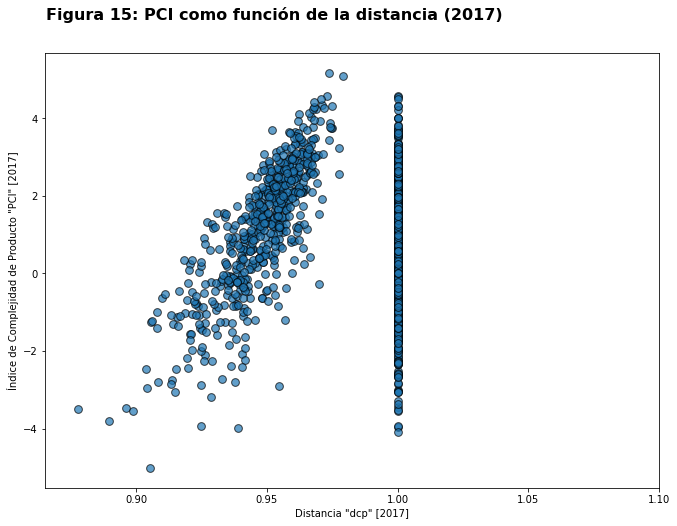

In [223]:
# Initialize layout
fig, ax = plt.subplots(figsize = (11, 8))

distance2017=df_final_ec['distancia']
pci2017=df_final_ec['pci']
# countryNames=df_PciCoi_ec['Country']
# nameCode=df_PciCoi_ec['country_code']

plt.xlim(0.865, 1.1)

plt.scatter(distance2017, pci2017, s=60, alpha=0.7, edgecolors="k",cmap='silver');

plt.suptitle(
    "Figura 15: PCI como función de la distancia (2017)",
    fontsize=16,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",  wrap=True,
)

# # Se añade el label y el color sólo a Ecuador. 
# for (disz,pciz) in zip(distance2017, pci2017):
#         if disz <1:
#           plt.scatter(disz, pciz, alpha=0.7,cmap='silver')
          # plt.text(pbiz, Coiz, nz, va='bottom', ha='right')
        # elif Coiz>=1.8:
        #   plt.scatter(pbiz, Coiz, alpha=0.9, edgecolors="r",cmap='orange')
        #   plt.text(pbiz, Coiz, codez, va='bottom', ha='right')

      

plt.xlabel('Distancia "dcp" [2017]')
plt.ylabel('Índice de Complejidad de Producto "PCI" [2017]')